In [4]:
# Import the packages into your Python environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Combined.csv')

<ipython-input-5-9099600491c5>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Combined.csv')


In [6]:
data.head()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign


In [20]:
data.tail()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
1215885,487569,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sctp,186.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1215886,487570,3,0.235607,0.235607,0.235607,0.235607,0.235607,0.235607,sctp,186.0,...,NaN,610.0,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1215887,487571,764,0.099927,0.099927,0.099927,0.099927,0.099927,0.099927,tcp,0.0,...,NaN,NaN,2.237373e+09,1.983280e+09,0.0,0.0,0.0,Benign,Benign,Benign
1215888,487572,3,1.307852,1.307852,1.307852,1.307852,1.307852,1.307852,sctp,186.0,...,NaN,610.0,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1215889,487573,1,0.476803,0.476803,0.476803,0.476803,0.476803,0.476803,sctp,186.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign


In [21]:
data

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,487569,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sctp,186.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1215886,487570,3,0.235607,0.235607,0.235607,0.235607,0.235607,0.235607,sctp,186.0,...,NaN,610.0,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1215887,487571,764,0.099927,0.099927,0.099927,0.099927,0.099927,0.099927,tcp,0.0,...,NaN,NaN,2.237373e+09,1.983280e+09,0.0,0.0,0.0,Benign,Benign,Benign
1215888,487572,3,1.307852,1.307852,1.307852,1.307852,1.307852,1.307852,sctp,186.0,...,NaN,610.0,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign


In [16]:
set(data['State'])

{'ACC', 'CON', 'ECO', 'FIN', 'INT', 'NRS', 'REQ', 'RSP', 'RST', 'TST', 'URP'}

In [18]:
data.columns

Index(['Unnamed: 0', 'Seq', 'Dur', 'RunTime', 'Mean', 'Sum', 'Min', 'Max',
       'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'sHops',
       'dHops', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes',
       'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load',
       'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'SrcGap',
       'DstGap', 'Rate', 'SrcRate', 'DstRate', 'State', 'SrcWin', 'DstWin',
       'sVid', 'dVid', 'SrcTCPBase', 'DstTCPBase', 'TcpRtt', 'SynAck',
       'AckDat', 'Label', 'Attack Type', 'Attack Tool'],
      dtype='object')

In [19]:
data.nunique()


Unnamed: 0      728316
Seq             137210
Dur             218694
RunTime         218694
Mean            218694
Sum             218694
Min             218694
Max             218694
Proto                8
sTos                12
dTos                 7
sDSb                12
dDSb                 6
sTtl                35
dTtl                33
sHops               27
dHops               26
Cause                3
TotPkts            572
SrcPkts            472
DstPkts            462
TotBytes         24614
SrcBytes         17540
DstBytes         10079
Offset         1118981
sMeanPktSz       21243
dMeanPktSz       15441
Load            230997
SrcLoad         226800
DstLoad         148712
Loss                24
SrcLoss             14
DstLoss             14
pLoss              170
SrcGap              15
DstGap              17
Rate            188573
SrcRate         171389
DstRate         142821
State               11
SrcWin            1087
DstWin            1085
sVid                 1
dVid       

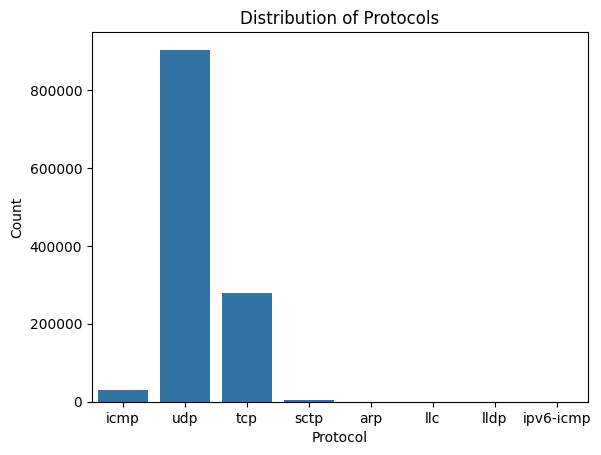

In [7]:
sns.countplot(x='Proto', data=data)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Distribution of Protocols')
plt.show()

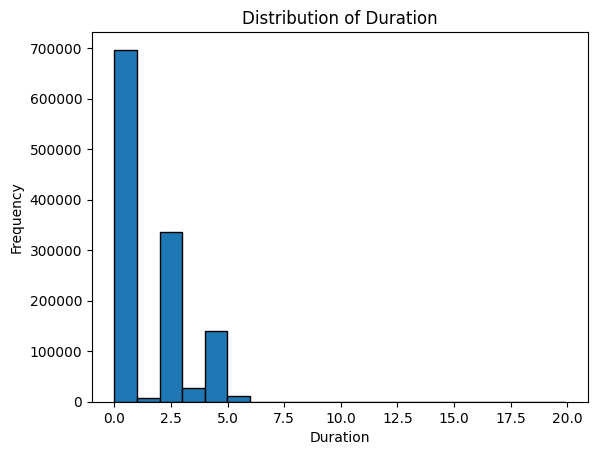

In [8]:
plt.hist(data['Dur'], bins=20, edgecolor='black')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show()

In [9]:


# Example for 'Attack Type' column using Plotly Treemap
attack_counts = data['Attack Type'].value_counts().reset_index()
attack_counts.columns = ['Attack Type', 'Count']

fig = px.treemap(attack_counts, path=['Attack Type'], values='Count',
                 title='Distribution of Attack Types')

fig.show()

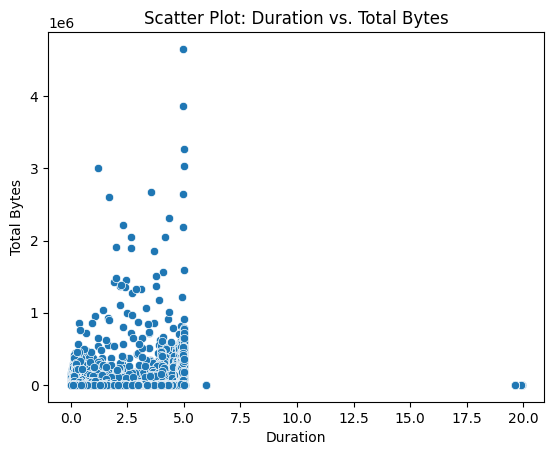

In [10]:
sns.scatterplot(x='Dur', y='TotBytes', data=data)
plt.xlabel('Duration')
plt.ylabel('Total Bytes')
plt.title('Scatter Plot: Duration vs. Total Bytes')
plt.show()

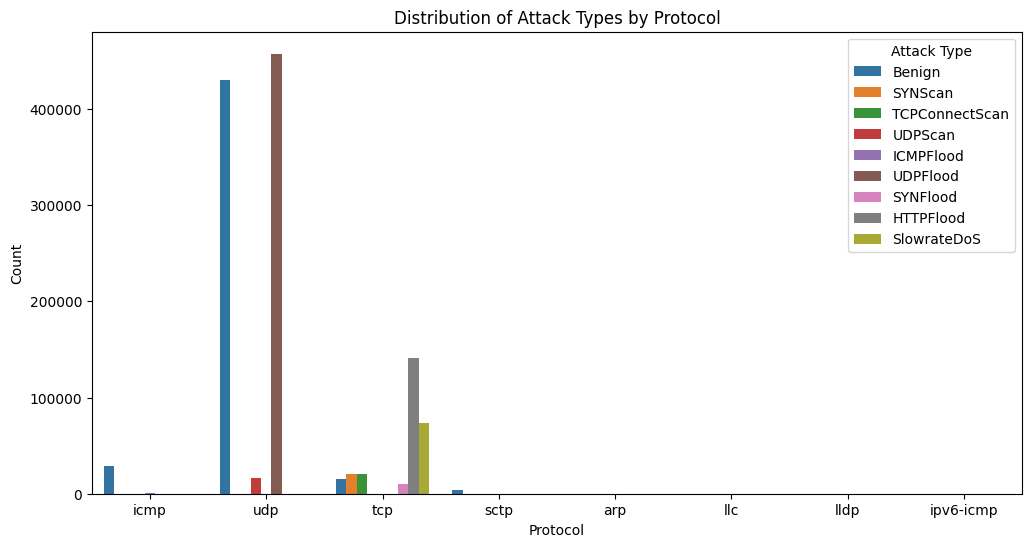

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Proto', hue='Attack Type', data=data)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Protocol')
plt.legend(title='Attack Type')
plt.show()

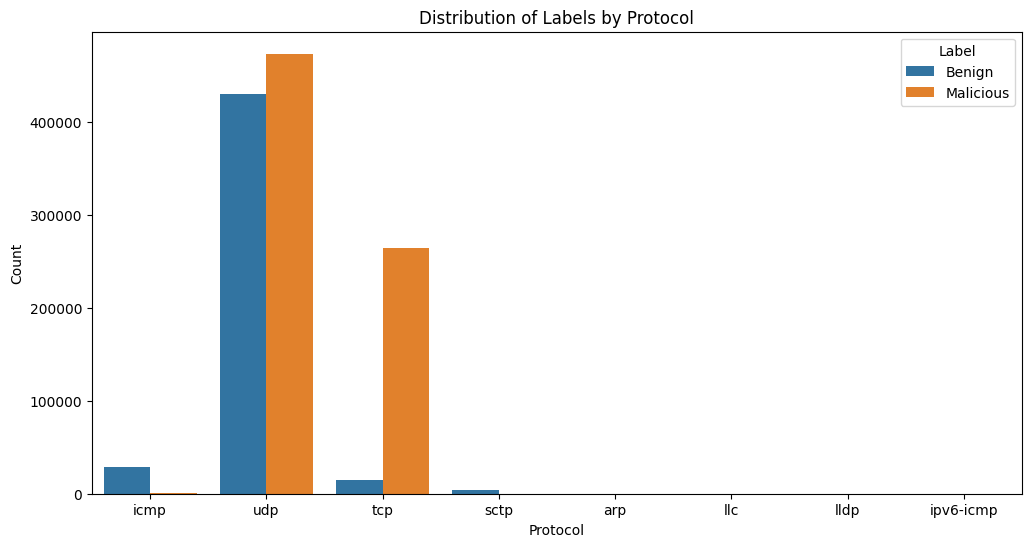

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Proto', hue='Label', data=data)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Distribution of Labels by Protocol')
plt.legend(title='Label')
plt.show()

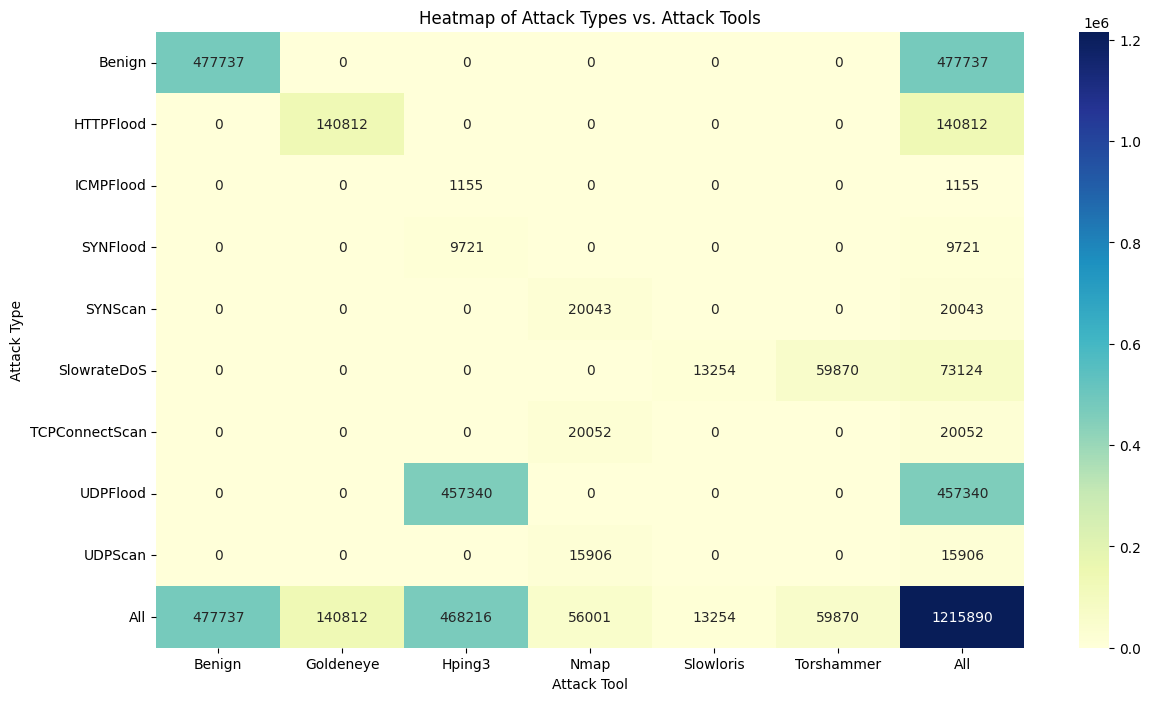

In [13]:
cross_tab = pd.crosstab(data['Attack Type'], data['Attack Tool'], margins=True)

plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', cbar=True)
plt.xlabel('Attack Tool')
plt.ylabel('Attack Type')
plt.title('Heatmap of Attack Types vs. Attack Tools')
plt.show()

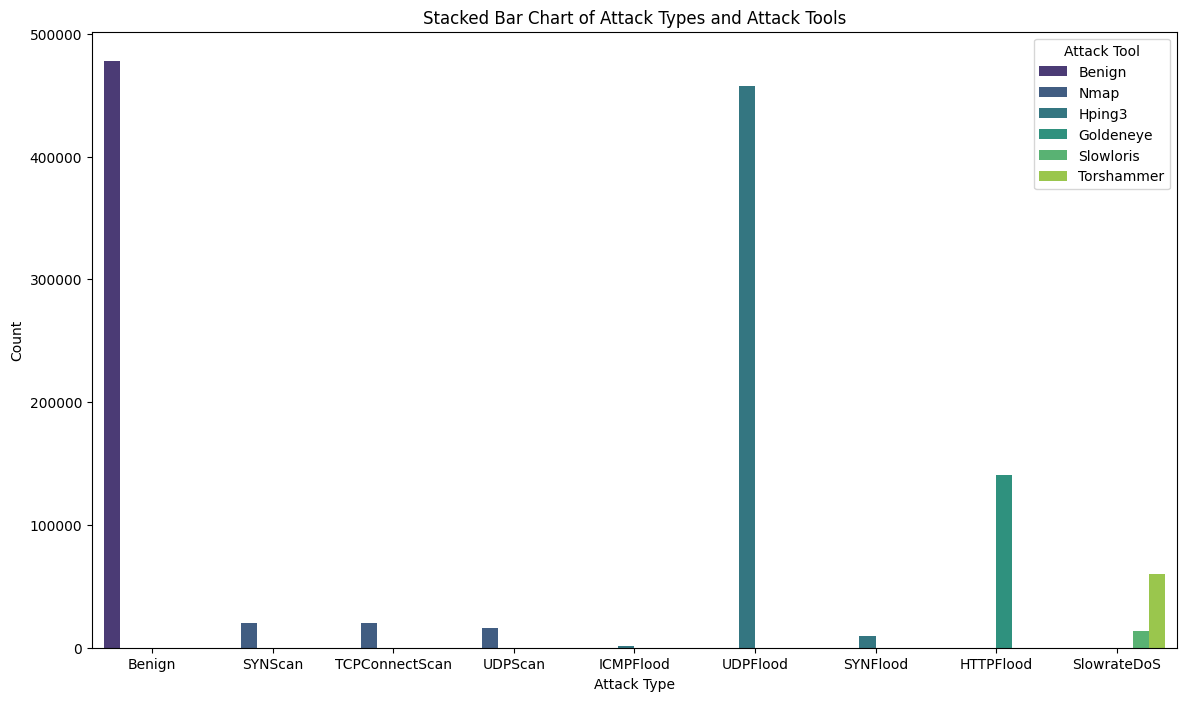

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Attack Type' and 'Attack Tool' are columns in your DataFrame (replace with actual column names)
plt.figure(figsize=(14, 8))
sns.countplot(x='Attack Type', hue='Attack Tool', data=data, palette='viridis', saturation=0.75)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Attack Types and Attack Tools')
plt.legend(title='Attack Tool', bbox_to_anchor=(1, 1))
plt.show()
